# **Parkinson Disease Detection using a Convolutional Autoencoder with a SLM**

## **GPU**

In [1]:
'''from IPython.display import HTML, clear_output
from subprocess import getoutput
s = getoutput('nvidia-smi')
if 'K80' in s:gpu = 'K80'
elif 'T4' in s:gpu = 'T4'
elif 'P100' in s:gpu = 'P100'
elif 'P4' in s:gpu = 'P4'
display(HTML(f"<h1>{gpu}</h1>"))'''

'from IPython.display import HTML, clear_output\nfrom subprocess import getoutput\ns = getoutput(\'nvidia-smi\')\nif \'K80\' in s:gpu = \'K80\'\nelif \'T4\' in s:gpu = \'T4\'\nelif \'P100\' in s:gpu = \'P100\'\nelif \'P4\' in s:gpu = \'P4\'\ndisplay(HTML(f"<h1>{gpu}</h1>"))'

## **Libraries**

In [2]:
import pandas as pd # Library to process the dataframe
import numpy as np # Library to handle with numpy arrays
import warnings # Library that handles all the types of warnings during execution
import matplotlib.pyplot as plt# Library that handles ploting of  the graphs
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore") # Ignore all the warnings

## **Data Preprocessing**

In [3]:
df=pd.read_csv('parkinsons.csv')
df=df.dropna(how='any')
df['MDVP:Avg(Hz)']=(df['MDVP:Fhi(Hz)']+df['MDVP:Flo(Hz)'])/2
df['Shimmer:APQ(Avg)']=(df['Shimmer:APQ3']+df['Shimmer:APQ3'])/2
df['NR(Avg)']=(df['NHR']+df['HNR'])/2
df['Disease']=df['status']
df=df.drop(columns=['name','status'])
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,MDVP:Avg(Hz),Shimmer:APQ(Avg),NR(Avg),Disease
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,116.1495,0.02182,10.527555,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,131.2345,0.03134,9.552145,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,121.3330,0.02757,10.332045,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,124.6185,0.02924,10.328765,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,126.2180,0.03490,9.833335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,162.6195,0.02336,9.772320,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,171.2525,0.01604,9.582550,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,157.1460,0.01268,8.995075,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,235.9325,0.01265,9.546115,0


In [4]:
lst=[df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df,df]
Df=pd.concat(lst)
Df=Df.reset_index(drop=True)

In [5]:
Df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,MDVP:Avg(Hz),Shimmer:APQ(Avg),NR(Avg),Disease
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,116.1495,0.02182,10.527555,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,131.2345,0.03134,9.552145,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,121.3330,0.02757,10.332045,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,124.6185,0.02924,10.328765,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,126.2180,0.03490,9.833335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,162.6195,0.02336,9.772320,0
7796,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,171.2525,0.01604,9.582550,0
7797,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,157.1460,0.01268,8.995075,0
7798,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,235.9325,0.01265,9.546115,0


In [6]:
X=Df.iloc[:,:-1].values
Y=Df.iloc[:,-1].values

In [7]:
X

array([[1.1999200e+02, 1.5730200e+02, 7.4997000e+01, ..., 1.1614950e+02,
        2.1820000e-02, 1.0527555e+01],
       [1.2240000e+02, 1.4865000e+02, 1.1381900e+02, ..., 1.3123450e+02,
        3.1340000e-02, 9.5521450e+00],
       [1.1668200e+02, 1.3111100e+02, 1.1155500e+02, ..., 1.2133300e+02,
        2.7570000e-02, 1.0332045e+01],
       ...,
       [1.7468800e+02, 2.4000500e+02, 7.4287000e+01, ..., 1.5714600e+02,
        1.2680000e-02, 8.9950750e+00],
       [1.9876400e+02, 3.9696100e+02, 7.4904000e+01, ..., 2.3593250e+02,
        1.2650000e-02, 9.5461150e+00],
       [2.1428900e+02, 2.6027700e+02, 7.7973000e+01, ..., 1.6912500e+02,
        1.0260000e-02, 1.0626490e+01]])

In [8]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
#Splitting training and testing dataset
ts=0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ts, random_state=42,shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5850, 25) (1950, 25) (5850,) (1950,)


In [36]:
X_train = X_train.reshape(X_train.shape[0],5,5,1)
X_test = X_test.reshape(X_test.shape[0],5,5,1)

In [37]:
X_train.shape

(5850, 5, 5, 1)

## **Convolutional AutoEncoder**

In [38]:
from tensorflow.keras import layers 
import keras

In [48]:
input_shape = keras.Input(shape=(5,5,1))

x = layers.Conv2D(25, (1, 1), activation='relu', padding='same')(input_shape)
x = layers.MaxPooling2D((1, 1), padding='same')(x)
x = layers.Conv2D(15, (1, 1), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((1, 1), padding='same')(x)
x = layers.Conv2D(5, (1,1), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((1,1), padding='same')(x)

# at this point the representation is (5, 5, 1) 

x = layers.Conv2D(5, (1, 1), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((1, 1))(x)
x = layers.Conv2D(15, (1, 1), activation='relu', padding='same')(x)
x = layers.UpSampling2D((1, 1))(x)
x = layers.Conv2D(25, (1, 1), activation='relu')(x)
x = layers.UpSampling2D((1, 1))(x)
decoded = layers.Conv2D(1, (1, 1), activation='softmax', padding='same')(x)

In [49]:
autoencoder = keras.Model(input_shape, decoded)
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
encoder = keras.Model(input_shape, encoded)
encoder.save('CAE-Sm.h5')

In [50]:
hist=autoencoder.fit(X_train, X_train, epochs=1000,batch_size=128,shuffle=True,validation_data=(X_test, X_test))

Epoch 1/1000
46/46 [==============================] - 2s 20ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/1000
46/46 [==============================] - 1s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/1000
46/46 [==============================] - 1s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/1000
46/46 [==============================] - 1s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/1000
46/46 [==============================] - 1s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/1000
46/46 [==============================] - 1s 17ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/1000
46/46 [==========================

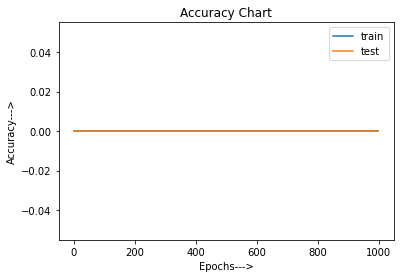

In [51]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.xlabel('Epochs--->')
plt.ylabel('Accuracy--->')
plt.title('Accuracy Chart')
plt.legend()

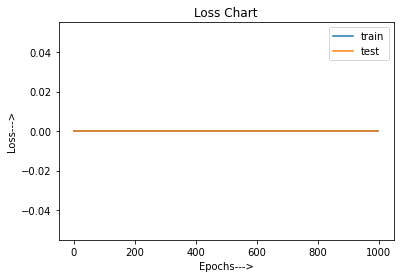

In [52]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.xlabel('Epochs--->')
plt.ylabel('Loss--->')
plt.title('Loss Chart')
plt.legend()

### **Model Libraries**

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import load_model
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import StackingClassifier
import pickle

### **Model Metrics**

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

## **Superlearner Model Layout**

In [66]:
models = list()
models.append(('LogR',LogisticRegression(solver='liblinear')))
models.append(('PC',Perceptron()))
models.append(('PAC',PassiveAggressiveClassifier()))
models.append(('RIC',RidgeClassifier()))
models.append(('RC',RandomForestClassifier(n_estimators=250)))
models.append(('EXTC',ExtraTreesClassifier(n_estimators=250)))
models.append(('XGBC',XGBClassifier()))
models.append(('MLPC',MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, learning_rate='adaptive', max_iter=750)))

In [67]:
# meta model
meta = XGBClassifier()

In [68]:
#Splitting training and testing dataset
ts=0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ts, random_state=42,shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5850, 25) (1950, 25) (5850,) (1950,)


In [69]:
X_train = X_train.reshape(X_train.shape[0],5,5,1)
X_test = X_test.reshape(X_test.shape[0],5,5,1)

### **Model Training/Validation**

In [70]:
#model = StackingClassifier(estimators=models, final_estimator=meta, cv=25)
model = VotingClassifier(estimators = models, voting ='hard')
encoder = load_model('CAE-Sm.h5')
print('Train', X_train.shape, y_train.shape, 'Test', X_test.shape, y_test.shape)
X_train_encode = encoder.predict(X_train)
X_test_encode = encoder.predict(X_test)
print(X_train_encode.shape)
print(X_test_encode.shape)
X_train=np.reshape(X_train_encode,(-1,125))
X_test = np.reshape(X_test_encode,(-1,125))
model.fit(X_train,y_train)
#score=model.score(X_test_encode,y_test)
filename = 'SLM.h5'
pickle.dump(model, open(filename, 'wb'))
print("Model saved succesfully!!!")
loaded_model = pickle.load(open(filename, 'rb'))
print("Loaded Model Sucessfully")
result = loaded_model.score(X_test, y_test)
print('Super learner model score: %.3f'%(result*100))
yhat = loaded_model.predict(X_test)
print('Super Learner: %.3f' % (accuracy_score(y_test, yhat) * 100))

Train (5850, 5, 5, 1) (5850,) Test (1950, 5, 5, 1) (1950,)
(5850, 5, 5, 5)
(1950, 5, 5, 5)
Model saved succesfully!!!
Loaded Model Sucessfully
Super learner model score: 98.974
Super Learner: 98.974


In [71]:
loaded_model = pickle.load(open(filename, 'rb'))
print("Loaded Model Sucessfully")
yhat = loaded_model.predict(X_test)

Loaded Model Sucessfully


In [72]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [73]:
yhat

array([1, 1, 1, ..., 1, 1, 1])

### **Model Score Analysis**

In [74]:
print("\n Score Metrics:")
print('\n Accuracy score:', round(accuracy_score(y_test, yhat) * 100))
print('\n Balanced Accuracy score' ,round(balanced_accuracy_score(y_test, yhat) * 100))
print('\n Cohen Kappa score' ,round(cohen_kappa_score(y_test, yhat) * 100))
print('\n F1 Score (Macro):' ,round(f1_score(y_test, yhat,average='macro') * 100))
print('\n F1 Score (Micro):' ,round(f1_score(y_test, yhat,average='micro') * 100))
print('\n F1 Score (Weighted):' ,round(f1_score(y_test, yhat,average='weighted') * 100))
print('\n Jaccard Score (Macro):' ,round(jaccard_score(y_test, yhat,average='macro') * 100))
print('\n Jaccard Score (Micro):' ,round(jaccard_score(y_test, yhat,average='micro') * 100))
print('\n Jaccard Score (Weighted):' ,round(jaccard_score(y_test, yhat,average='weighted') * 100))
print("\n Loss Metrics:")
print('\n Hamming Loss :' ,hamming_loss(y_test, yhat))
print("\n Confusion matrix")
print('\n')
print(confusion_matrix(y_test,yhat))
print('\n')


 Score Metrics:

 Accuracy score: 99

 Balanced Accuracy score 99

 Cohen Kappa score 97

 F1 Score (Macro): 99

 F1 Score (Micro): 99

 F1 Score (Weighted): 99

 Jaccard Score (Macro): 97

 Jaccard Score (Micro): 98

 Jaccard Score (Weighted): 98

 Loss Metrics:

 Hamming Loss : 0.010256410256410256

 Confusion matrix


[[ 466    0]
 [  20 1464]]


